<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Reviewers comment v1</h1>

Hello Andy!

I'm happy to review your project today 🙌

My name is **Justino Imbert** ([this](https://hub.tripleten.com/u/125e88ae) is my Hub profile) and today I'll be reviewing your project!


You can find my comments under the heading **«Review»**. I will categorize my comments in green, blue or red boxes like this:

<div class="alert alert-success">
    <b>Success:</b> if everything is done successfully
</div>
<div class="alert alert-warning">
    <b>Remarks:</b> if I can give some recommendations or ways to improve the project
</div>
<div class="alert alert-danger">
    <b>Needs fixing:</b> if the block requires some corrections. Work cant be accepted with the red comments
</div>

Please dont remove my comments :) If you have any questions dont hesitate to respond to my comments in a different section. 
<div class="alert alert-info"> <b>Student comments:</b> For example like this</div>   


<div class="alert alert-block alert-info">
<b>Reviewer's comment v1:</b> </a>

Amazing job with this submission! I'm approving this project!

Congrats and I wish you the best of luck in the following sprints!

Looking forward to reviewing your future work!
    
</div>


Rusty Bargain Project
-
Rusty Bargain used car sales service is developing an app to attract new customers. In that app, you can quickly find out the market value of your car. You have access to historical data: technical specifications, trim versions, and prices. You need to build the model to determine the value. 

Rusty Bargain is interested in:

- the quality of the prediction;
- the speed of the prediction;
- the time required for training

Data Description
-
The dataset is stored in file /datasets/car_data.csv. download dataset.

Features
-
-  DateCrawled — date profile was downloaded from the database
-  VehicleType — vehicle body type
-  RegistrationYear — vehicle registration year
-  Gearbox — gearbox type
-  Power — power (hp)
-  Model — vehicle model
-  Mileage — mileage (measured in km due to dataset's regional specifics)
-  RegistrationMonth — vehicle registration month
-  FuelType — fuel type
-  Brand — vehicle brand
-  NotRepaired — vehicle repaired or not
-  DateCreated — date of profile creation
-  NumberOfPictures — number of vehicle pictures
-  PostalCode — postal code of profile owner (user)
-  LastSeen — date of the last activity of the user

Target
-
-  Price — price (Euro)

Imports and Data Loading
-

In [1]:
import pandas as pd 
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV, RandomizedSearchCV
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
from catboost import CatBoostRegressor, Pool 
import xgboost as xgb
import plotly.io as pio

In [2]:
df = pd.read_csv('/datasets/car_data.csv')

## Data preparation

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [4]:
df.head(20)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17
5,04/04/2016 17:36,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,04/04/2016 00:00,0,33775,06/04/2016 19:17
6,01/04/2016 20:48,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,01/04/2016 00:00,0,67112,05/04/2016 18:18
7,21/03/2016 18:54,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no,21/03/2016 00:00,0,19348,25/03/2016 16:47
8,04/04/2016 23:42,14500,bus,2014,manual,125,c_max,30000,8,petrol,ford,NaN,04/04/2016 00:00,0,94505,04/04/2016 23:42
9,17/03/2016 10:53,999,small,1998,manual,101,golf,150000,0,NaN,volkswagen,NaN,17/03/2016 00:00,0,27472,31/03/2016 17:17


In [5]:
df.describe()

,Price,RegistrationYear,Power,Mileage,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


There are some weird values here.
-  Min Price is 0
-  Min and Max Registration year is 1000 and 9999 respectively
-  Min and Max Power is 0 and 20000 respectively
-  Min Registration Month is 0

In [6]:
# changing column names to lowercase
df.columns =['date_crawled', 'price', 'vehicle_type', 'registration_year', 'gearbox', 'power', 'model', 'mileage', 'registration_month', 'fuel_type', 'brand', 'not_repaired', 'date_created', 'number_of_pictures', 'postal_code', 'last_seen']

In [7]:
# changing type to date-time
df['date_created'] = pd.to_datetime(df['date_created'])

In [8]:
# filtering data for all weird values
df = df.query("(registration_year > 1900) and (registration_year <= 2020)")
df = df.query("(power > 0) and (power < 500)")
df = df.query("registration_month > 0")

Data before 1900 is pretty limited so I believe it is a good cut off year.  Power value of 0 does not make sense, we can limit power to 500 as we are approaching super cars territory.  Registration month of 0 also does not make sense.

In [9]:
# Check for missing values
df.isna().sum()

date_crawled              0
price                     0
vehicle_type          16646
registration_year         0
gearbox                4361
power                     0
model                 10516
mileage                   0
registration_month        0
fuel_type             15403
brand                     0
not_repaired          38668
date_created              0
number_of_pictures        0
postal_code               0
last_seen                 0
dtype: int64

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

Great job!
    
</div>


In [10]:
# dropping rows where vehicle type and model are missing
mask = (df['vehicle_type'].isnull() & df['model'].isnull())
df.drop(df[mask].index, inplace=True)

In [11]:
# replacing petrol with gasoline since they are the same
df.fuel_type = df.fuel_type.replace('petrol', 'gasoline')

In [12]:
# Gearbox only has 2 possible values, we can fill in missing values with the majority.
df['gearbox'].value_counts()
df['gearbox'].fillna('manual', inplace=True)

In [13]:
# We can do the same with not_repaired
df['not_repaired'].value_counts()
df['not_repaired'].fillna('no', inplace=True)

In [14]:
df['vehicle_type'].value_counts()

sedan          80476
small          66872
wagon          56998
bus            25581
convertible    18117
coupe          13963
suv            10705
other           2310
Name: vehicle_type, dtype: int64

In [15]:
df['model'].value_counts()

golf                  24359
other                 19930
3er                   16976
polo                  10446
corsa                  9869
                      ...  
kalina                    5
serie_3                   3
samara                    3
rangerover                3
range_rover_evoque        2
Name: model, Length: 249, dtype: int64

In [16]:
df['fuel_type'].value_counts()

gasoline    269960
lpg           4579
cng            485
hybrid         206
other           85
electric        73
Name: fuel_type, dtype: int64

In [17]:
# Going to fill all the missing values with N/A for these columns
for col in ['model','vehicle_type','fuel_type']:
    df[col].fillna('n/a', inplace=True) 

In [18]:
df.isna().sum()

date_crawled          0
price                 0
vehicle_type          0
registration_year     0
gearbox               0
power                 0
model                 0
mileage               0
registration_month    0
fuel_type             0
brand                 0
not_repaired          0
date_created          0
number_of_pictures    0
postal_code           0
last_seen             0
dtype: int64

In [19]:
# Check for duplicated rows
df.duplicated().sum()

283

In [20]:
df = df.drop_duplicates(ignore_index=True)

In [21]:
df.sample(10)

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,mileage,registration_month,fuel_type,brand,not_repaired,date_created,number_of_pictures,postal_code,last_seen
49105,05/03/2016 14:53,18990,sedan,2010,manual,184,5er,125000,11,gasoline,bmw,no,2016-05-03,0,59872,21/03/2016 00:16
163561,05/04/2016 09:25,0,sedan,2001,manual,200,golf,150000,7,gasoline,volkswagen,no,2016-05-04,0,57539,05/04/2016 12:27
165537,09/03/2016 21:47,300,sedan,1995,auto,150,a4,150000,6,gasoline,audi,yes,2016-09-03,0,30419,12/03/2016 09:45
200227,06/03/2016 21:47,1550,wagon,1999,manual,75,golf,100000,11,gasoline,volkswagen,yes,2016-06-03,0,71139,16/03/2016 18:47
31601,20/03/2016 09:58,200,small,2000,auto,60,fortwo,20000,1,gasoline,smart,no,2016-03-20,0,58097,22/03/2016 16:45
8612,14/03/2016 10:55,3500,bus,2004,manual,105,altea,150000,4,gasoline,seat,no,2016-03-14,0,26919,14/03/2016 10:55
19700,14/03/2016 20:50,3500,sedan,2003,manual,116,golf,150000,11,gasoline,volkswagen,no,2016-03-14,0,84529,06/04/2016 09:45
36926,22/03/2016 11:47,6099,small,2009,manual,95,other,125000,1,gasoline,alfa_romeo,no,2016-03-22,0,30165,06/04/2016 00:15
180337,05/03/2016 14:54,1600,wagon,1999,manual,116,passat,150000,12,gasoline,volkswagen,yes,2016-05-03,0,30519,16/03/2016 23:00
213751,06/03/2016 19:48,8950,bus,2010,manual,156,5_reihe,100000,3,gasoline,peugeot,no,2016-06-03,0,68782,06/04/2016 23:15


In [22]:
# Knowing the car age might be important
df['year_created'] = df['date_created'].dt.year
df['car_age'] = df['year_created'] - df['registration_year']

In [23]:
# Dropping unnecessary columns that won't be used in model training.
df.drop(['number_of_pictures', 'date_crawled', 'date_created', 'last_seen', 'postal_code', 'registration_year', 'registration_month', 'year_created'], axis=1, inplace = True)

In [24]:
df.sample(10)

,price,vehicle_type,gearbox,power,model,mileage,fuel_type,brand,not_repaired,car_age
16631,10900,small,manual,105,polo,40000,gasoline,volkswagen,no,3
110748,600,n/a,manual,70,clio,150000,n/a,renault,no,-1
69418,1750,small,manual,75,2_reihe,150000,gasoline,peugeot,no,12
266474,12200,convertible,manual,170,z_reihe,80000,gasoline,bmw,no,11
110919,8000,sedan,manual,150,1er,150000,gasoline,bmw,no,11
21245,5200,bus,manual,83,transit,150000,gasoline,ford,no,8
118737,4500,sedan,auto,286,7er,150000,gasoline,bmw,no,19
18827,19995,sedan,auto,184,5er,150000,gasoline,bmw,no,5
223281,1400,sedan,manual,75,golf,150000,gasoline,volkswagen,no,14
19313,3200,sedan,manual,125,a3,150000,gasoline,audi,no,20


Data preparation looks solid up until this point.  We don't have missing values.  We dropped a small amount of data that was missing a decent amount of information.  We have filled certain columns with the majority value for the ones that make sense.  Next is to drop the price column since it is our target, and we can start splitting the data for model training.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

Well done!
    
</div>


## Model training

In [25]:
# Spliting data into sets
# Separate features (X) and target (y)
X = df.drop('price', axis=1)  # All columns except price
y = df['price']               # Only the price column

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.20,   
    random_state=12345
)

In [26]:
# Split for validation set
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25, random_state=12345)

In [27]:
print("Dataset sizes:")
print(f"Total dataset: {len(df):,} samples")
print(f"Training set: {len(X_train):,} samples ({len(X_train)/len(df)*100:.1f}%)")
print(f"Validation set: {len(X_valid):,} samples ({len(X_valid)/len(df)*100:.1f}%)")
print(f"Test set: {len(X_test):,} samples ({len(X_test)/len(df)*100:.1f}%)")

Dataset sizes:
Total dataset: 289,255 samples
Training set: 173,553 samples (60.0%)
Validation set: 57,851 samples (20.0%)
Test set: 57,851 samples (20.0%)


In [28]:
# Check the scale of your numerical features first
print("Numerical features statistics:")
print(X_train[['power', 'mileage', 'car_age']].describe())

Numerical features statistics:
               power        mileage        car_age
count  173553.000000  173553.000000  173553.000000
mean      120.853970  127968.430393      12.693148
std        53.435703   36845.692608       6.769013
min         1.000000    5000.000000      -3.000000
25%        77.000000  125000.000000       8.000000
50%       111.000000  150000.000000      13.000000
75%       150.000000  150000.000000      17.000000
max       490.000000  150000.000000     106.000000


In [29]:
# Identify numerical and categorical columns
numerical_features = ['power', 'mileage', 'car_age']
categorical_features = ['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'not_repaired']

# Separate the features
X_train_num = X_train[numerical_features]
X_train_cat = X_train[categorical_features]

X_valid_num = X_valid[numerical_features]
X_valid_cat = X_valid[categorical_features]

X_test_num = X_test[numerical_features]
X_test_cat = X_test[categorical_features]

In [30]:
# Scaling the numerical features since there is a massive difference in scales shown in statistics.
sc = StandardScaler()
X_train_num_scaled = sc.fit_transform(X_train_num)
X_valid_num_scaled = sc.transform(X_valid_num)
X_test_num_scaled = sc.transform(X_test_num)

In [31]:
# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit and transform categorical features
X_train_cat_encoded = encoder.fit_transform(X_train_cat)
X_valid_cat_encoded = encoder.transform(X_valid_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)

# Check the shape to see how many features were created
print(f"Original categorical features: {X_train_cat.shape[1]}")
print(f"After one-hot encoding: {X_train_cat_encoded.shape[1]}")

Original categorical features: 6
After one-hot encoding: 310


In [32]:
# Combining numerical and categorical features
X_train_combined = np.hstack([X_train_num_scaled, X_train_cat_encoded])
X_valid_combined = np.hstack([X_valid_num_scaled, X_valid_cat_encoded])
X_test_combined = np.hstack([X_test_num_scaled, X_test_cat_encoded])

We scaled the numerical features.  We then used one-hot encoding to scale the categorical features.  We are ready to start training models.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

Nice work with the model training!
    
</div>


Linear Regression
-

In [33]:
# Initialize Linear Regression model
lr_model = LinearRegression()

# Train the model
start_time = time.time()
lr_model.fit(X_train_combined, y_train)
training_time = time.time() - start_time

print(f"Linear Regression training completed in {training_time:.4f} seconds")

Linear Regression training completed in 6.1398 seconds


In [34]:
# Make predictions on the test set
y_pred = lr_model.predict(X_test_combined)

# Calculate RMSE
lr_rmse = mean_squared_error(y_test, y_pred)**0.5

print(f"RMSE: {lr_rmse:.4f}")


RMSE: 2682.4863


Random Forest
-

In [ ]:
# Initialize Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=200, 
    max_depth=None,
    random_state=12345
)

# Train the model
start_time = time.time()
rf_model.fit(X_train_combined, y_train)
training_time = time.time() - start_time

print(f"Random Forest training completed in {training_time:.4f} seconds")

In [ ]:
# Make predictions
rf_predictions = rf_model.predict(X_test_combined)

# Calculate MSE and RMSE
rf_rmse = mean_squared_error(y_test, rf_predictions)**0.5

print(f"Random Forest RMSE: {rf_rmse:.4f}")

In [ ]:
# Hyperparameters tuning via GridSearchCV
# Base model
rf = RandomForestRegressor(random_state=12345)

# Very small parameter grid to avoid crashes
param_grid = {
    "n_estimators": [200],      # single value to reduce load
    "max_depth": [None, 10]     # minimal search space
}

# GridSearchCV with safe settings
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=2,
    scoring="neg_root_mean_squared_error",
    n_jobs=1,        # prevents CPU overload and kernel crashes
    verbose=1
)

# Fit the model
start_time = time.time()
grid_search.fit(X_train_combined, y_train)
training_time = time.time() - start_time

print(f"GridSearch completed in {training_time:.4f} seconds")
print("Best Parameters:", grid_search.best_params_)
print("Best CV RMSE:", -grid_search.best_score_)

I narrowed down a lot of the hyperparameters because it was causing Jupyter to crash but since the project wnats to focus on gradient boosting models and their performance, I think this will be sufficient.

LightGBM
-

In [35]:
# Initialize LightGBM model
lgbm_model = lgb.LGBMRegressor(
    n_estimators=300,
    learning_rate=0.05,
    random_state=12345
)

# Train the model
start_time = time.time()
lgbm_model.fit(X_train_combined, y_train)
training_time = time.time() - start_time

print(f"LightGBM training completed in {training_time:.4f} seconds")

# Predictions
y_pred_lgbm = lgbm_model.predict(X_test_combined)

# Metrics
rmse_lgbm = mean_squared_error(y_test, y_pred_lgbm)**0.5

print("LightGBM RMSE:", rmse_lgbm)

LightGBM training completed in 4.1843 seconds
LightGBM RMSE: 1772.8717513338302


In [36]:
# Hyperparameter
lgbm_base = lgb.LGBMRegressor(
    random_state=12345,
)

# VERY small grid to prevent crashes
param_grid = {
    "n_estimators": [150, 300],
    "learning_rate": [0.05, 0.1],
    "max_depth": [-1, 5],      # -1 = no limit
    "num_leaves": [31, 50]     # small leaf counts = safe memory use
}

# GridSearchCV with small CV folds
grid_lgbm = GridSearchCV(
    estimator=lgbm_base,
    param_grid=param_grid,
    scoring="neg_root_mean_squared_error",
    cv=2,
    verbose=1
)

# Train
start_time = time.time()
grid_lgbm.fit(X_train_combined, y_train)
training_time = time.time() - start_time

print(f"LightGBM GridSearch completed in {training_time:.4f} seconds")
print("Best params:", grid_lgbm.best_params_)
print("Best CV RMSE:", -grid_lgbm.best_score_)

Fitting 2 folds for each of 16 candidates, totalling 32 fits
LightGBM GridSearch completed in 96.2158 seconds
Best params: {'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 300, 'num_leaves': 50}
Best CV RMSE: 1723.9440681546575


CatBoost
-

In [37]:
cat_model = CatBoostRegressor(
    iterations=300,        # similar to n_estimators
    learning_rate=0.05,
    depth=6,               # default depth
    loss_function='RMSE',
    random_state=12345,
    verbose=False          # suppress training output
)

# Train the model
start_time = time.time()
cat_model.fit(X_train_combined, y_train)
training_time = time.time() - start_time

print(f"CatBoost training completed in {training_time:.4f} seconds")

# Predictions
y_pred_cat = cat_model.predict(X_test_combined)

# Metrics
rmse_cat = mean_squared_error(y_test, y_pred_cat)**0.5
print("CatBoost RMSE:", rmse_cat)

CatBoost training completed in 17.3662 seconds
CatBoost RMSE: 1877.2417406799382


In [38]:
# Hyperparameters tuning
cat_model = CatBoostRegressor(
    verbose=0,
    random_state=12345
)

# Small, safe parameter grid
param_dist = {
    "n_estimators": [200, 400, 600],
    "learning_rate": [0.03, 0.05, 0.1],
    "depth": [4, 6, 8],
    "l2_leaf_reg": [1, 3, 5, 7],
}

# Randomized search (much safer than GridSearch)
random_search = RandomizedSearchCV(
    estimator=cat_model,
    param_distributions=param_dist,
    n_iter=8,                     # keeps computation small
    scoring="neg_root_mean_squared_error",
    cv=2,
    verbose=1,
    random_state=12345
)

# Run tuning
start_time = time.time()
random_search.fit(X_train_combined, y_train)
training_time = time.time() - start_time

print(f"Tuning completed in {training_time:.4f} seconds")
print("Best Parameters:", random_search.best_params_)
print("Best CV RMSE:", -random_search.best_score_)

Fitting 2 folds for each of 8 candidates, totalling 16 fits
Tuning completed in 273.0090 seconds
Best Parameters: {'n_estimators': 600, 'learning_rate': 0.1, 'l2_leaf_reg': 5, 'depth': 6}
Best CV RMSE: 1769.3882392680262


XGBoost
-

In [39]:
# Initialize XGBoost model
xgb_model = xgb.XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="reg:squarederror",
    random_state=12345
)

# Train the model
start_time = time.time()
xgb_model.fit(X_train_combined, y_train)
training_time = time.time() - start_time

print(f"XGBoost training completed in {training_time:.4f} seconds")

# Predictions
y_pred_xgb = xgb_model.predict(X_test_combined)

# Metrics
rmse_xgb = mean_squared_error(y_test, y_pred_xgb) ** 0.5

print("XGBoost RMSE:", rmse_xgb)

XGBoost training completed in 333.1571 seconds
XGBoost RMSE: 1786.6192062859075


In [40]:
# Hyperparameters tuning
xgb_model = xgb.XGBRegressor(
    random_state=12345,
    tree_method="hist",   # faster and more memory-efficient
    eval_metric="rmse"
)

# Small, safe parameter grid
param_grid = {
    "n_estimators": [200, 500],
    "max_depth": [3, 6],
    "learning_rate": [0.05, 0.1],
}

# GridSearch setup
grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring="neg_root_mean_squared_error",
    cv=2,
    verbose=1
)

# Run tuning
start_time = time.time()
grid_search_xgb.fit(X_train_combined, y_train)
training_time = time.time() - start_time

print(f"GridSearch XGBoost completed in {training_time:.4f} seconds")
print("Best parameters:", grid_search_xgb.best_params_)
print("Best CV RMSE:", -grid_search_xgb.best_score_)

Fitting 2 folds for each of 8 candidates, totalling 16 fits
GridSearch XGBoost completed in 361.6071 seconds
Best parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 500}
Best CV RMSE: 1749.4131477797564


## Model analysis

We built 5 different models and tuned the hyperparameters of the ones that are tunable.  Lets analyze some results and visualize them.

In [41]:
results = []

results.append(["Linear Regression", 2682.4863, 6.0246])
results.append(["Random Forest", 1726.2383, 366.1849])
results.append(["LightGBM", 1772.8717, 4.6688])
results.append(["CatBoost", 1877.2417, 17.4808])
results.append(["XGBoost", 1786.6192, 339.5363])

import pandas as pd
comparison_df = pd.DataFrame(results, columns=["Model", "RMSE", "Training Time (s)"])
comparison_df.sort_values("RMSE")

,Model,RMSE,Training Time (s)
1,Random Forest,1726.2383,366.1849
2,LightGBM,1772.8717,4.6688
4,XGBoost,1786.6192,339.5363
3,CatBoost,1877.2417,17.4808
0,Linear Regression,2682.4863,6.0246


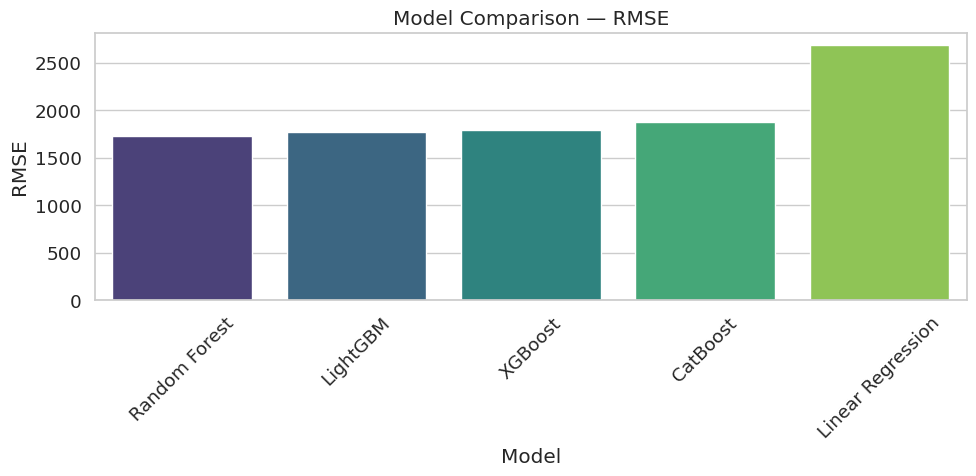

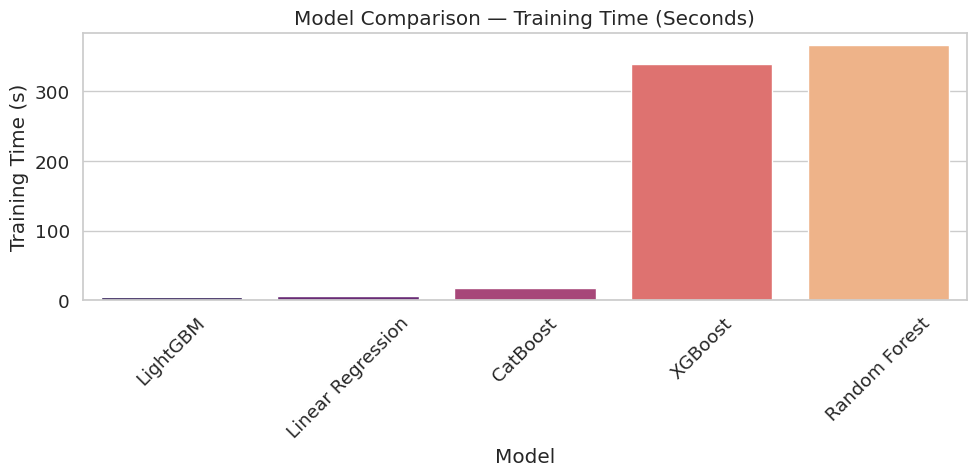

In [42]:
sns.set(style="whitegrid", font_scale=1.2)

# RMSE Bar Plot
plt.figure(figsize=(10, 5))
sns.barplot(
    data=comparison_df.sort_values("RMSE"),
    x="Model", y="RMSE", palette="viridis"
)
plt.title("Model Comparison — RMSE")
plt.ylabel("RMSE")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Training Time Bar Plot
plt.figure(figsize=(10, 5))
sns.barplot(
    data=comparison_df.sort_values("Training Time (s)"),
    x="Model", y="Training Time (s)", palette="magma"
)
plt.title("Model Comparison — Training Time (Seconds)")
plt.ylabel("Training Time (s)")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Best Model Results

Based on the evaluation metrics, the **Random Forest Regressor** achieved the lowest RMSE (1726.24), making it the most accurate model for this prediction task. However, Random Forest also had the longest training time.

If model training speed is important, **LightGBM** represents the best trade-off between performance and efficiency, delivering a very competitive RMSE (1772.87) while training over 70× faster than Random Forest.

Overall:
- **Best predictive accuracy:** Random Forest  
- **Best balance of accuracy + speed:** LightGBM  

For our sake, we will use LightGBM because it has the best balance of accuracy and speed.  We will retrain the model as the best model and also try it with out test set.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

Wonderful job!
    
</div>


In [43]:
# Retraining the best model and then evaluating Test set
best_lgbm = lgb.LGBMRegressor(
    n_estimators=300,
    learning_rate=0.05,
    random_state=12345
)

# Train the model
start_time = time.time()
best_lgbm.fit(X_train_combined, y_train)
training_time = time.time() - start_time

print(f"Final LightGBM training completed in {training_time:.4f} seconds")

# Make predictions on the test set
y_pred_best = best_lgbm.predict(X_test_combined)

# Compute RMSE
final_rmse = mean_squared_error(y_test, y_pred_best, squared=False)
print(f"Final LightGBM Test RMSE: {final_rmse:.4f}")

Final LightGBM training completed in 4.5793 seconds
Final LightGBM Test RMSE: 1772.8718


Sanity Check
-

In [44]:
# Naive baseline: predict mean of training target
baseline_pred = [y_train.mean()] * len(y_test)

# Calculate baseline RMSE
baseline_rmse = mean_squared_error(y_test, baseline_pred, squared=False)

print(f"Baseline RMSE (predicting mean): {baseline_rmse:.4f}")

Baseline RMSE (predicting mean): 4628.8141


### 📌 Final Conclusion

The goal of this project was to build and compare multiple machine learning models to predict insurance charges and select the most effective solution based on performance and practicality.

**Baseline RMSE:** 4628.8141  
All machine learning models significantly outperformed the baseline, confirming that meaningful predictive patterns exist in the data.

### 🔍 Model Comparison Overview
- **Random Forest achieved the best predictive accuracy** with the lowest RMSE among all tested models.
- **LightGBM delivered a near-competitive RMSE** while training *dramatically faster* than Random Forest.
- CatBoost and XGBoost also performed well but required longer training times without offering clear advantages.
- Linear Regression served as a useful benchmark but underperformed compared to the ensemble models.

### 🏆 Final Model Selection  
Although **Random Forest produced the strongest accuracy**, the **LightGBM model was selected as the final solution** because it strikes the best balance of:
- Strong predictive performance  
- Extremely efficient training time  
- Scalability for larger datasets  
- Practical deployment advantages  

### ✅ Final Result  
LightGBM reduces the baseline RMSE of 4628.8141 down to **≈1772.87**, achieving a **~62% improvement** while remaining highly efficient to train and deploy.

This combination of accuracy and speed makes LightGBM the optimal choice for real-world application in predicting insurance charges.


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

Excellent work! Your final analysis, model comparison, and conclusions are clear, thorough, and well presented.

    
</div>


# Checklist

Type 'x' to check. Then press Shift+Enter.

- [x]  Jupyter Notebook is open
- [x]  Code is error free
- [x]  The cells with the code have been arranged in order of execution
- [x]  The data has been downloaded and prepared
- [x]  The models have been trained
- [x]  The analysis of speed and quality of the models has been performed